In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.neighbors import KNeighborsRegressor
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

In [4]:
# Create training and test set
# Import data
data = pd.read_csv("TaxiTrip2021SubsetOriginal.csv")

# Split set into 80 training/20 test
train = data.sample(frac=0.8)
test = data.drop(train.index).sample(frac=1.0)

# Include only these columns
train_X = train[['Trip Seconds', 'Trip Miles', 'Fare']]
train_Y = train['Tips']

test_X = test[['Trip Seconds', 'Trip Miles', 'Fare']]
test_Y = test['Tips']

In [6]:
# Create KNN model and find RMSE
KNN = KNeighborsRegressor().fit(train_X, train_Y)
pred_Y = KNN.predict(test_X)
error = math.sqrt(mean_squared_error(test_Y,pred_Y))
print("RMSE: " + "{:.2f}".format(error))

RMSE: 2.92


In [11]:
display(pd.DataFrame({"Y Tips": test_Y, "Predicted": np.round(pred_Y,2)}))
pd.options.display.min_rows = 25

,Y Tips,Predicted
2910,0.00,0.64
6422,0.00,0.00
4471,0.00,0.00
8325,0.00,1.03
8715,0.00,1.16
5678,0.00,1.36
5256,0.00,0.84
2699,0.00,0.40
3318,0.00,0.00
6736,0.00,0.00


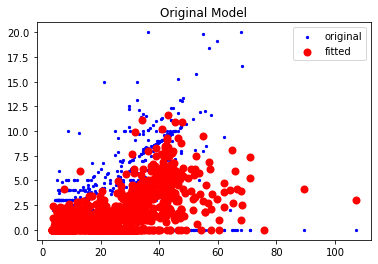

In [12]:
# Graph Fare on Y Test and Fare on Y Prediction
plt.scatter(test_X['Fare'], test_Y, s=5, color="blue", label="original")
plt.scatter(test_X['Fare'], pred_Y, lw=2, color="red", label="fitted")
plt.title('Original Model')
plt.legend()
plt.show()

In [10]:
# Save model 
pickle.dump(KNN, open('KNN_Model.sav', 'wb'))